In [453]:
import numpy as np 
# numpy vs python list
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score,f1_score
from tensorflow import keras
import warnings  
warnings.filterwarnings('ignore')

In [454]:
df=pd.read_csv("alzheimers.csv")

In [455]:
def information(data):
    d_type=data.dtypes
    n_o_U=data.nunique()
    nulls=data.isnull().sum()

    print(pd.DataFrame({"d_types":d_type,"n_uniques":n_o_U,"n_nuls":nulls},index=data.columns))
    print(f"data have  {data.duplicated().sum()} numbers of duplications ")
    print(f"this data have {data.shape[0]} records and {data.shape[1] }  features")

In [456]:
information(df)

                           d_types  n_uniques  n_nuls
PatientID                    int64       2149       0
Age                          int64         31       0
Gender                       int64          2       0
Ethnicity                    int64          4       0
EducationLevel               int64          4       0
BMI                        float64       2149       0
Smoking                      int64          2       0
AlcoholConsumption         float64       2149       0
PhysicalActivity           float64       2149       0
DietQuality                float64       2149       0
SleepQuality               float64       2149       0
FamilyHistoryAlzheimers      int64          2       0
CardiovascularDisease        int64          2       0
Diabetes                     int64          2       0
Depression                   int64          2       0
HeadInjury                   int64          2       0
Hypertension                 int64          2       0
SystolicBP                  

In [457]:
df.drop(["PatientID","DoctorInCharge"],axis=1,inplace=True)

In [458]:
tar_col="Diagnosis"

In [459]:
cat_cols =[col for col in df.columns if df[col].nunique()<=10]
num_cols=[col for col in df.columns if df[col].nunique()>10]

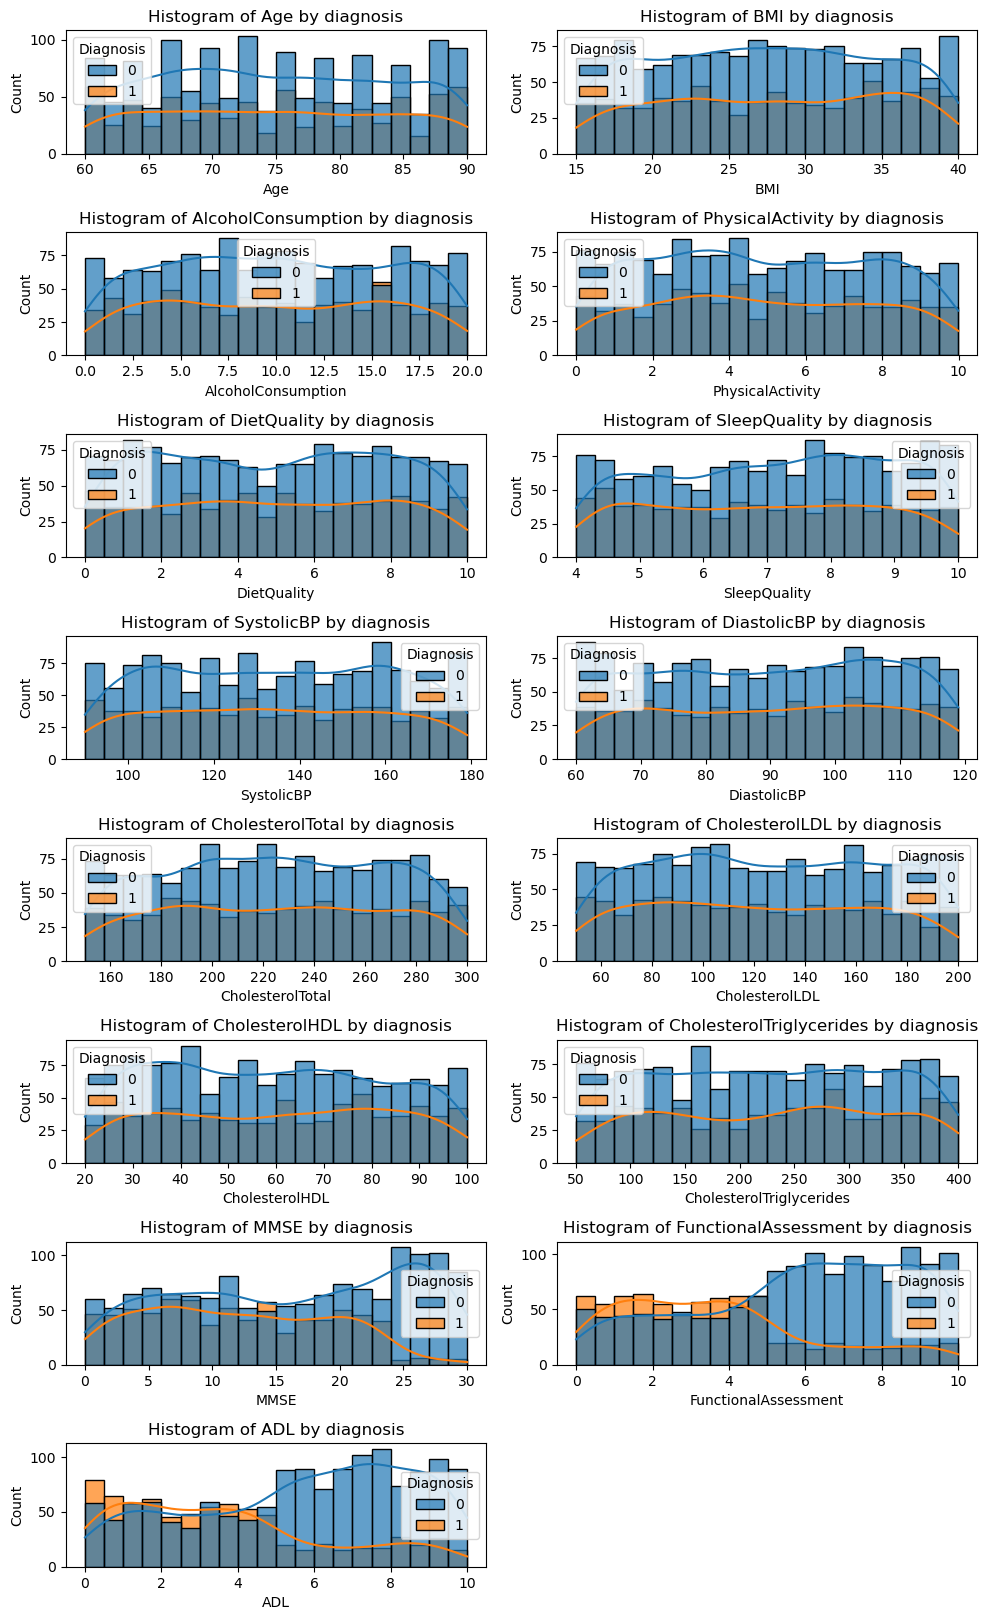

In [460]:
plt.figure(figsize=(10,30))

for i, column in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, i+1)
    sns.histplot(data=df, x=column, hue=tar_col, kde=True, bins=20, alpha=0.7)
    plt.title(f"Histogram of {column} by diagnosis")

plt.tight_layout()
plt.show()

# Alzheimer's Disease Data Analysis

## Histogram Insights by Diagnosis

### 1. Age Distribution
- The dataset includes individuals aged between 60 and 90.
- Both diagnosed and non-diagnosed groups are distributed across all ages, but the density of diagnosed cases (1) slightly increases in older age groups.

### 2. BMI (Body Mass Index)
- The BMI distribution is fairly uniform across both groups.
- There is no strong distinction between diagnosed and non-diagnosed individuals based on BMI.

### 3. Alcohol Consumption
- Alcohol consumption varies widely but does not show a strong pattern differentiating diagnosed from non-diagnosed individuals.
- The density curve suggests a slightly higher concentration of diagnosed cases (1) at lower alcohol consumption levels.

### 4. Physical Activity
- Higher physical activity levels seem to be more common in non-diagnosed individuals (0).
- Diagnosed cases (1) show a relatively lower trend in physical activity.

### 5. Diet Quality
- Both groups have a broad range of diet quality scores.
- No distinct separation is observed, though better diet quality might be slightly more common among non-diagnosed individuals.

### 6. Sleep Quality
- Higher sleep quality appears slightly more frequent in non-diagnosed individuals.
- Poor sleep quality might be associated with a higher chance of diagnosis.

### 7. Blood Pressure (Systolic & Diastolic)
- Both systolic and diastolic blood pressure values appear similarly distributed across diagnosed and non-diagnosed groups.
- No clear separation is observed.

### 8. Cholesterol Levels (Total, LDL, HDL, Triglycerides)
- Total cholesterol and LDL levels seem to have similar distributions across both groups.
- Cholesterol HDL levels appear more variable but without strong separation.
- Triglycerides distribution also does not show a significant diagnostic trend.

### 9. Mini-Mental State Examination (MMSE)
- Non-diagnosed individuals (0) tend to have higher MMSE scores, while diagnosed cases (1) show a shift towards lower scores.
- This suggests a potential cognitive decline in diagnosed individuals.

### 10. Functional Assessment & Activities of Daily Living (ADL)
- Functional assessment scores are generally higher in non-diagnosed individuals.
- Diagnosed individuals (1) tend to have lower ADL scores, indicating potential impairments in daily activities.

## Conclusion
- Cognitive and functional assessments (MMSE, ADL, and Functional Assessment) show the most notable differences between diagnosed and non-diagnosed individuals.
- Physical activity and sleep quality might also be contributing factors.
- Other variables such as BMI, blood pressure, and cholesterol do not show a strong separation between groups.

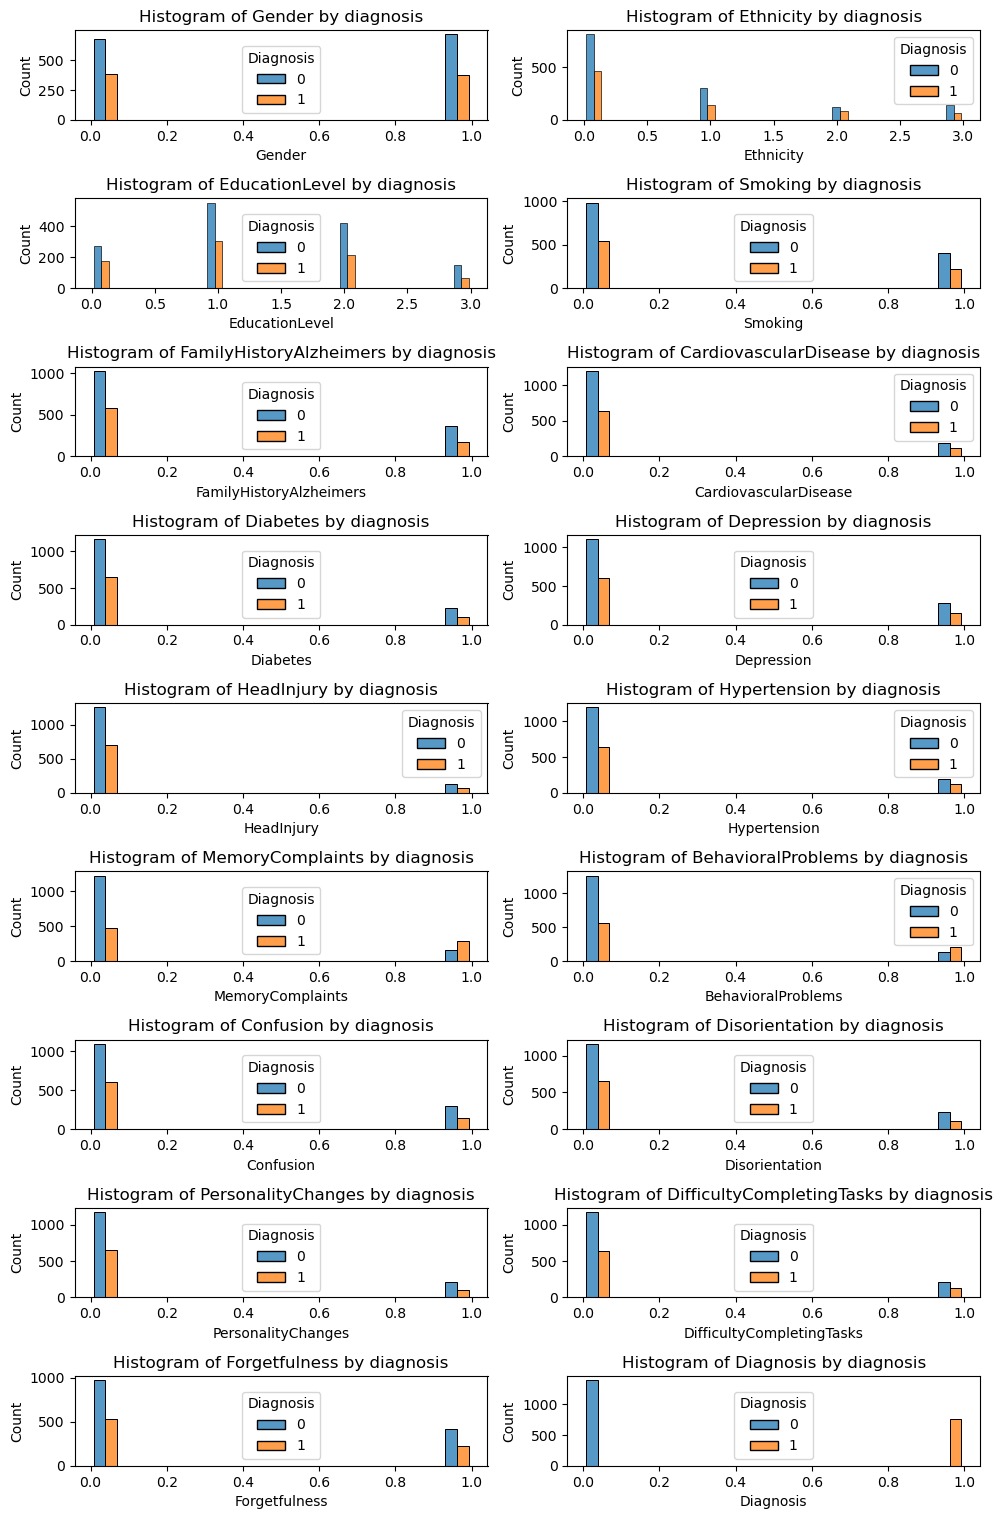

In [461]:
plt.figure(figsize=(10,30))

for i, column in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 2, i+1)
    sns.histplot(data=df, x=column, hue=tar_col, multiple="dodge", shrink=0.8)

    plt.title(f"Histogram of {column} by diagnosis")

plt.tight_layout()
plt.show()

## Insights from the Histograms by Diagnosis

### 1. *Gender Distribution*
   - The majority of the data consists of one gender, with a smaller representation of the other.
   - The diagnosis distribution appears similar across genders.

### 2. *Ethnicity Distribution*
   - Most individuals belong to a single ethnic category.
   - There is a slight variation in diagnosis rates across ethnic groups.

### 3. *Education Level*
   - Education levels show a skewed distribution with a concentration in lower levels.
   - Higher education levels might be less represented in the dataset.

### 4. *Smoking and Health Conditions*
   - Most individuals are non-smokers.
   - Presence of conditions like cardiovascular disease, diabetes, and hypertension is relatively low but shows a slight correlation with diagnosis.

### 5. *Family History of Alzheimer’s*
   - A large number of individuals have no family history of Alzheimer’s.
   - Those with a family history seem to have a higher proportion of positive diagnoses.

### 6. *Cognitive and Behavioral Symptoms*
   - Symptoms like memory complaints, confusion, disorientation, personality changes, and forgetfulness are more prevalent in diagnosed individuals.
   - Behavioral problems and difficulty completing tasks also correlate with positive diagnoses.

### 7. *Head Injury*
   - Head injuries are not common, but there seems to be a slight increase in diagnosed cases among those with a history of head injuries.

### 8. *Overall Trends*
   - Cognitive and behavioral symptoms show a strong association with diagnosis.
   - Family history and certain health conditions also appear to have a role in predicting diagnosis.
   - Some demographic factors like gender and ethnicity may have minor variations, but their influence is less clear.

### Conclusion
The dataset suggests that memory complaints, confusion, disorientation, and behavioral symptoms have a stronger association with diagnosis compared to general demographic factors. Further statistical analysis (e.g., chi-square tests, logistic regression) could provide deeper insights into these correlations.

In [462]:
def draw_pie_chart(df, hue_col, group_col):
    data = df.groupby(hue_col)[group_col].value_counts(normalize=True).reset_index(name="percentage")
    labels = data.apply(lambda row: f"{row[group_col]} ({row[hue_col]})", axis=1)  # Format: "Category (Target)"
    
    plt.pie(data["percentage"], labels=labels, autopct="%1.1f%%", 
            startangle=90, colors=plt.get_cmap("Set2").colors, shadow=True)
    plt.ylabel("")  # Hide y-label


In [463]:
len(cat_cols)

18

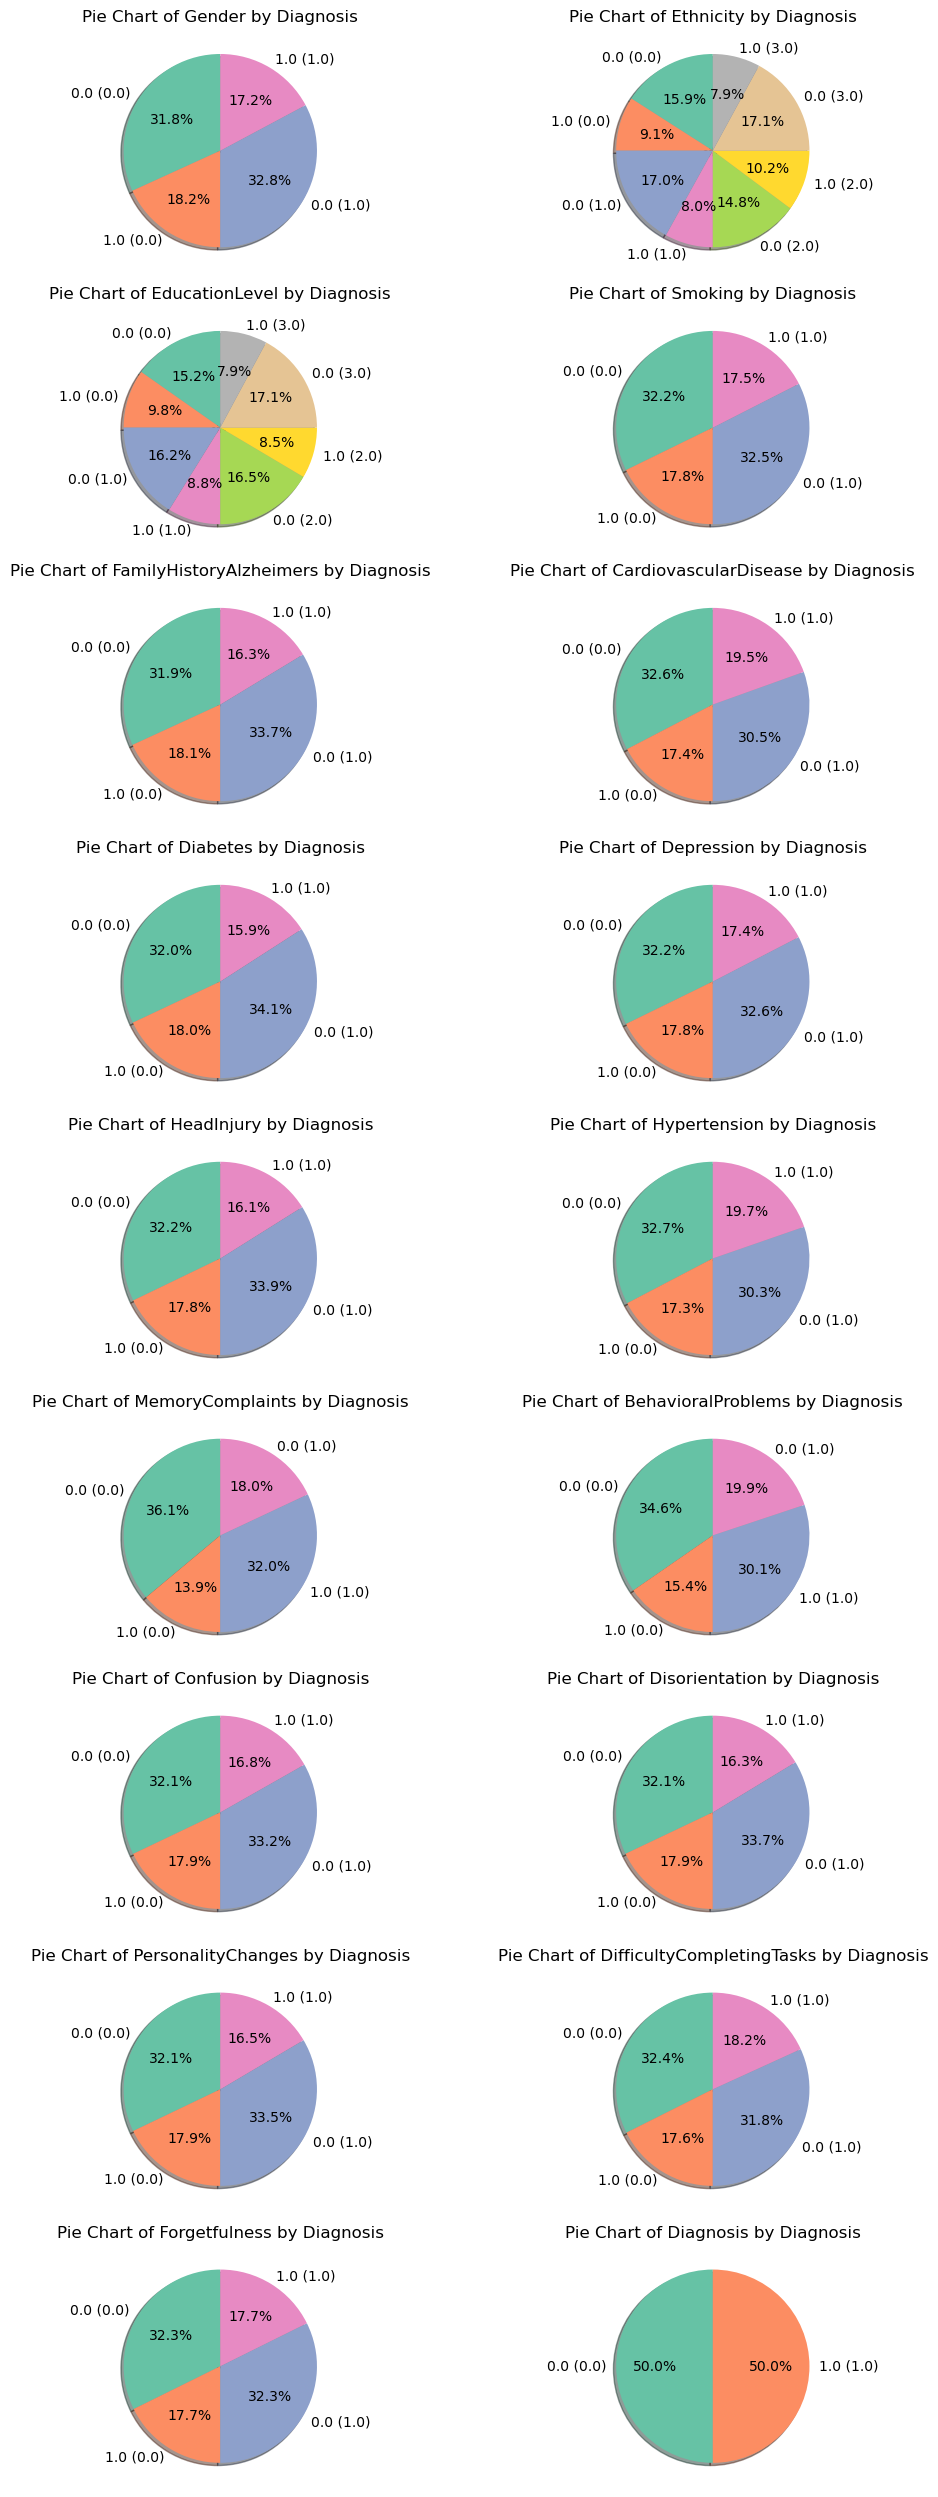

In [464]:
plt.figure(figsize=(10, 50))  # Adjust figure size for better visibility
for i, column in enumerate(cat_cols, 1):  # Start index from 1 for subplot indexing
    plt.subplot(len(cat_cols), 2, i)  # Adjust grid layout (2 columns)
    draw_pie_chart(df, column, tar_col)  # Correct argument order
    plt.title(f"Pie Chart of {column} by {tar_col}")  # Update title for clarity

plt.tight_layout()
plt.show()

# Insights from Pie Charts: Categorical Features vs. Diagnosis

## 1. Gender Distribution by Diagnosis
- The distribution between genders for each diagnosis category appears fairly balanced.
- No clear dominance of one gender over the other in Alzheimer’s disease cases.

## 2. Ethnicity vs. Diagnosis
- Different ethnic groups exhibit varying proportions across the diagnosis categories.
- Some ethnicities may have slightly higher prevalence in one category over another.

## 3. Education Level and Diagnosis
- There are notable variations in education level across different diagnosis groups.
- Higher education levels might be associated with lower Alzheimer’s diagnosis rates.

## 4. Smoking and Diagnosis
- The distribution of smokers and non-smokers appears fairly even across different diagnosis categories.
- No clear correlation is observed between smoking status and Alzheimer’s diagnosis.

## 5. Family History of Alzheimer’s
- Individuals with a family history of Alzheimer’s appear more frequently in certain categories.
- This suggests a possible genetic predisposition.

## 6. Cardiovascular Disease and Diagnosis
- A significant portion of diagnosed individuals also have cardiovascular disease.
- This aligns with known risk factors linking heart health to brain health.

## 7. Diabetes and Diagnosis
- Diabetes presence among diagnosed individuals suggests potential metabolic risk factors.
- Further investigation into diabetes and cognitive decline is recommended.

## 8. Depression and Diagnosis
- Individuals with Alzheimer’s show a higher proportion of those with depression.
- The role of mental health in cognitive decline could be a key area of study.

## 9. Head Injury and Diagnosis
- A notable percentage of individuals with Alzheimer’s have a history of head injuries.
- This supports existing research suggesting that traumatic brain injuries may increase the risk of neurodegenerative diseases.

## 10. Hypertension and Diagnosis
- Hypertension appears prevalent among those diagnosed.
- Supports research on vascular contributions to Alzheimer’s disease.

## 11. Behavioral Problems and Diagnosis
- Some diagnosed individuals exhibit more behavioral issues.
- This could be useful for early symptom detection.

## 12. Memory Complaints and Personality Changes
- A higher percentage of diagnosed individuals report memory complaints and personality changes.
- These could serve as early warning signs for Alzheimer’s.

## 13. Confusion and Diagnosis
- A significant number of individuals with Alzheimer’s report confusion.
- Confusion could be an early sign, indicating cognitive decline in affected individuals.

## 14. Difficulty Completing Tasks and Diagnosis
- Individuals struggling with task completion are more likely to be in the diagnosed category.
- This suggests a decline in executive function and memory-related processes.

## 15. Forgetfulness and Disorientation
- Forgetfulness and disorientation are common among diagnosed cases.
- These symptoms might serve as primary indicators for diagnosis.

## 16. Final Diagnosis Distribution
- The diagnosis categories show relatively equal splits in some cases.
- A further breakdown of other influencing factors could help refine predictions.

### **Conclusion**
- Several risk factors such as **cardiovascular disease, diabetes, depression, head injury, and family history** seem linked to Alzheimer’s.
- **Cognitive symptoms** like **confusion, forgetfulness, disorientation, and difficulty completing tasks** appear frequently in diagnosed cases.
- **Behavioral symptoms** like **personality changes and memory complaints** also show a strong association.
- Further **statistical testing** and **predictive modeling** can help validate these relationships.

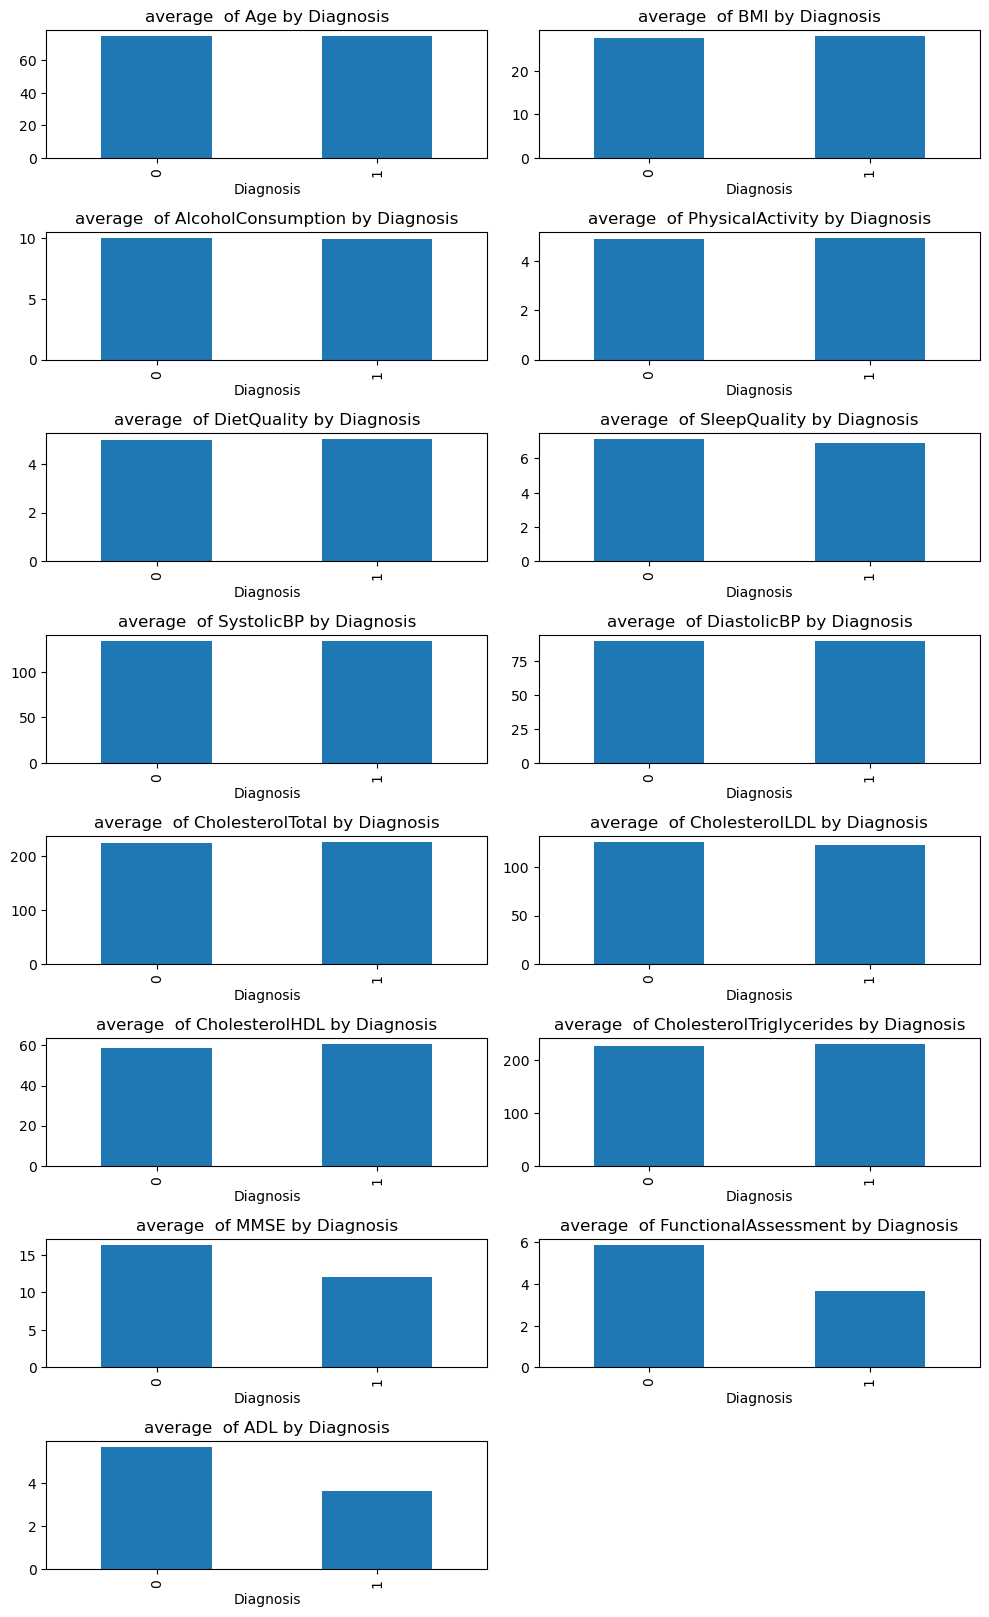

In [465]:
plt.figure(figsize=(10, 30))  # Adjust figure size for better visibility
for i,col in enumerate(num_cols, 1):  # Start index from 1 for subplot indexing
    plt.subplot(len(num_cols), 2, i)  # Adjust grid layout (2 columns)
    plt.title(f"average  of {col} by {tar_col}")  # Update title for clarity 
    df.groupby(tar_col)[col].mean().plot(kind="bar")
    df.groupby(tar_col)[col].mean()
plt.tight_layout()
plt.show()


# Insights from Mean Feature Analysis by Diagnosis

## 1. Age and BMI
- The average age of diagnosed and non-diagnosed individuals appears similar, indicating age alone may not be a distinguishing factor in this dataset.
- BMI shows little to no difference between groups, suggesting weight differences may not be a primary indicator of diagnosis.

## 2. Alcohol Consumption and Physical Activity
- The mean alcohol consumption is nearly identical for both diagnosed and non-diagnosed individuals, implying no strong correlation.
- Physical activity levels also appear similar, indicating that physical activity differences may not be a significant predictor.

## 3. Diet Quality and Sleep Quality
- Diet quality and sleep quality do not show significant variation between diagnosed and non-diagnosed groups.
- This suggests these lifestyle factors may not be direct contributors to diagnosis in this dataset.

## 4. Blood Pressure (Systolic & Diastolic)
- Both **SystolicBP** and **DiastolicBP** show no significant differences between the groups.
- This implies blood pressure alone may not be a major determinant of Alzheimer’s diagnosis in this dataset.

## 5. Cholesterol Levels (Total, LDL, HDL, Triglycerides)
- All cholesterol-related metrics (**Total Cholesterol, LDL, HDL, and Triglycerides**) appear similar in both diagnosed and non-diagnosed individuals.
- This suggests that cholesterol levels may not play a major role in distinguishing diagnosis.

## 6. Cognitive and Functional Scores (MMSE, Functional Assessment, ADL)
- **MMSE (Mini-Mental State Examination)** scores are lower in diagnosed individuals, indicating cognitive decline.
- **Functional Assessment** and **ADL (Activities of Daily Living)** scores are also lower in diagnosed individuals.
- These metrics strongly correlate with diagnosis, reinforcing their importance in identifying Alzheimer’s.

## Key Takeaways
- Lifestyle factors such as BMI, diet, sleep, and physical activity do not show significant differences.
- Cognitive function and daily living abilities (MMSE, Functional Assessment, ADL) are the most important distinguishing factors.
- Blood pressure and cholesterol levels do not exhibit clear patterns differentiating diagnosed individuals.


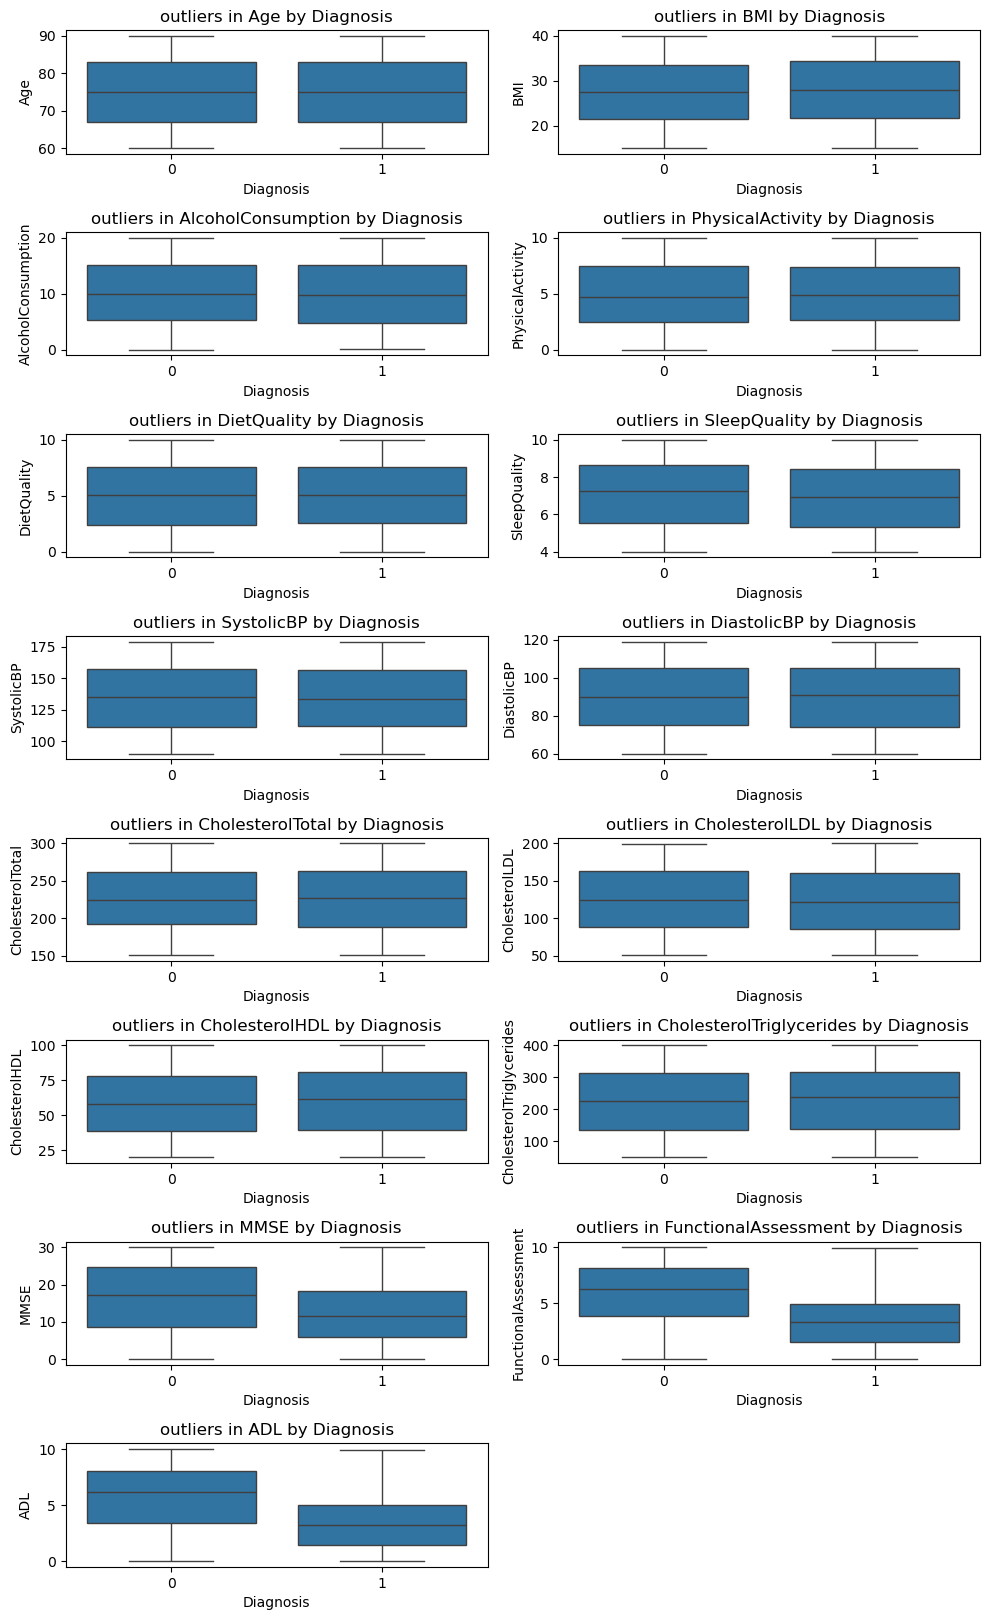

In [466]:
plt.figure(figsize=(10, 30))  # Adjust figure size for better visibility
for i,col in enumerate(num_cols, 1):  # Start index from 1 for subplot indexing
    plt.subplot(len(num_cols), 2, i)  # Adjust grid layout (2 columns)
    plt.title(f"outliers in {col} by {tar_col}")  # Update title for clarity 
    sns.boxplot(data=df, x=tar_col, y=col)
plt.tight_layout()
plt.show()


## Insights from Outlier Analysis

- Most of the features do not show significant outliers.
- Three features exhibit noticeable skewness:
  - **MMSE (Mini-Mental State Examination)**: Skewed to the left when the diagnosis is **1** (Alzheimer’s present).
  - **Functional Assessment**: Skewed to the left when the diagnosis is **1**.
  - **ADL (Activities of Daily Living)**: Skewed to the left when the diagnosis is **1**.
- For diagnosis **0** (no Alzheimer’s), these three features are slightly skewed to the right.
- This suggests that lower scores in **MMSE, Functional Assessment, and ADL** are more common in Alzheimer’s patients, indicating cognitive and functional decline.

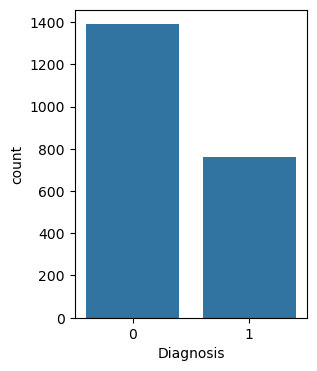

In [467]:
plt.figure(figsize=(3,4))
sns.countplot(data=df,x=df[tar_col])
plt.show()

In [468]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665


In [469]:
num_cols

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

## Reducing the Number of Unique Values in Numeric Columns

In datasets with continuous numerical features, some columns may contain a high number of unique values due to floating-point precision. To simplify analysis and improve model interpretability, we can reduce the number of unique values by rounding.

### Why Round Numeric Columns?
- Reduces the granularity of numeric features.
- Helps in categorization or binning for visualization.
- Can improve model generalization by reducing noise.

In [470]:
for col in df[num_cols].drop(["Age","SystolicBP","DiastolicBP"],axis=1).columns:
    df[col] = df[col].round(1)


In [471]:
information(df)

                           d_types  n_uniques  n_nuls
Age                          int64         31       0
Gender                       int64          2       0
Ethnicity                    int64          4       0
EducationLevel               int64          4       0
BMI                        float64        251       0
Smoking                      int64          2       0
AlcoholConsumption         float64        201       0
PhysicalActivity           float64        101       0
DietQuality                float64        101       0
SleepQuality               float64         61       0
FamilyHistoryAlzheimers      int64          2       0
CardiovascularDisease        int64          2       0
Diabetes                     int64          2       0
Depression                   int64          2       0
HeadInjury                   int64          2       0
Hypertension                 int64          2       0
SystolicBP                   int64         90       0
DiastolicBP                 

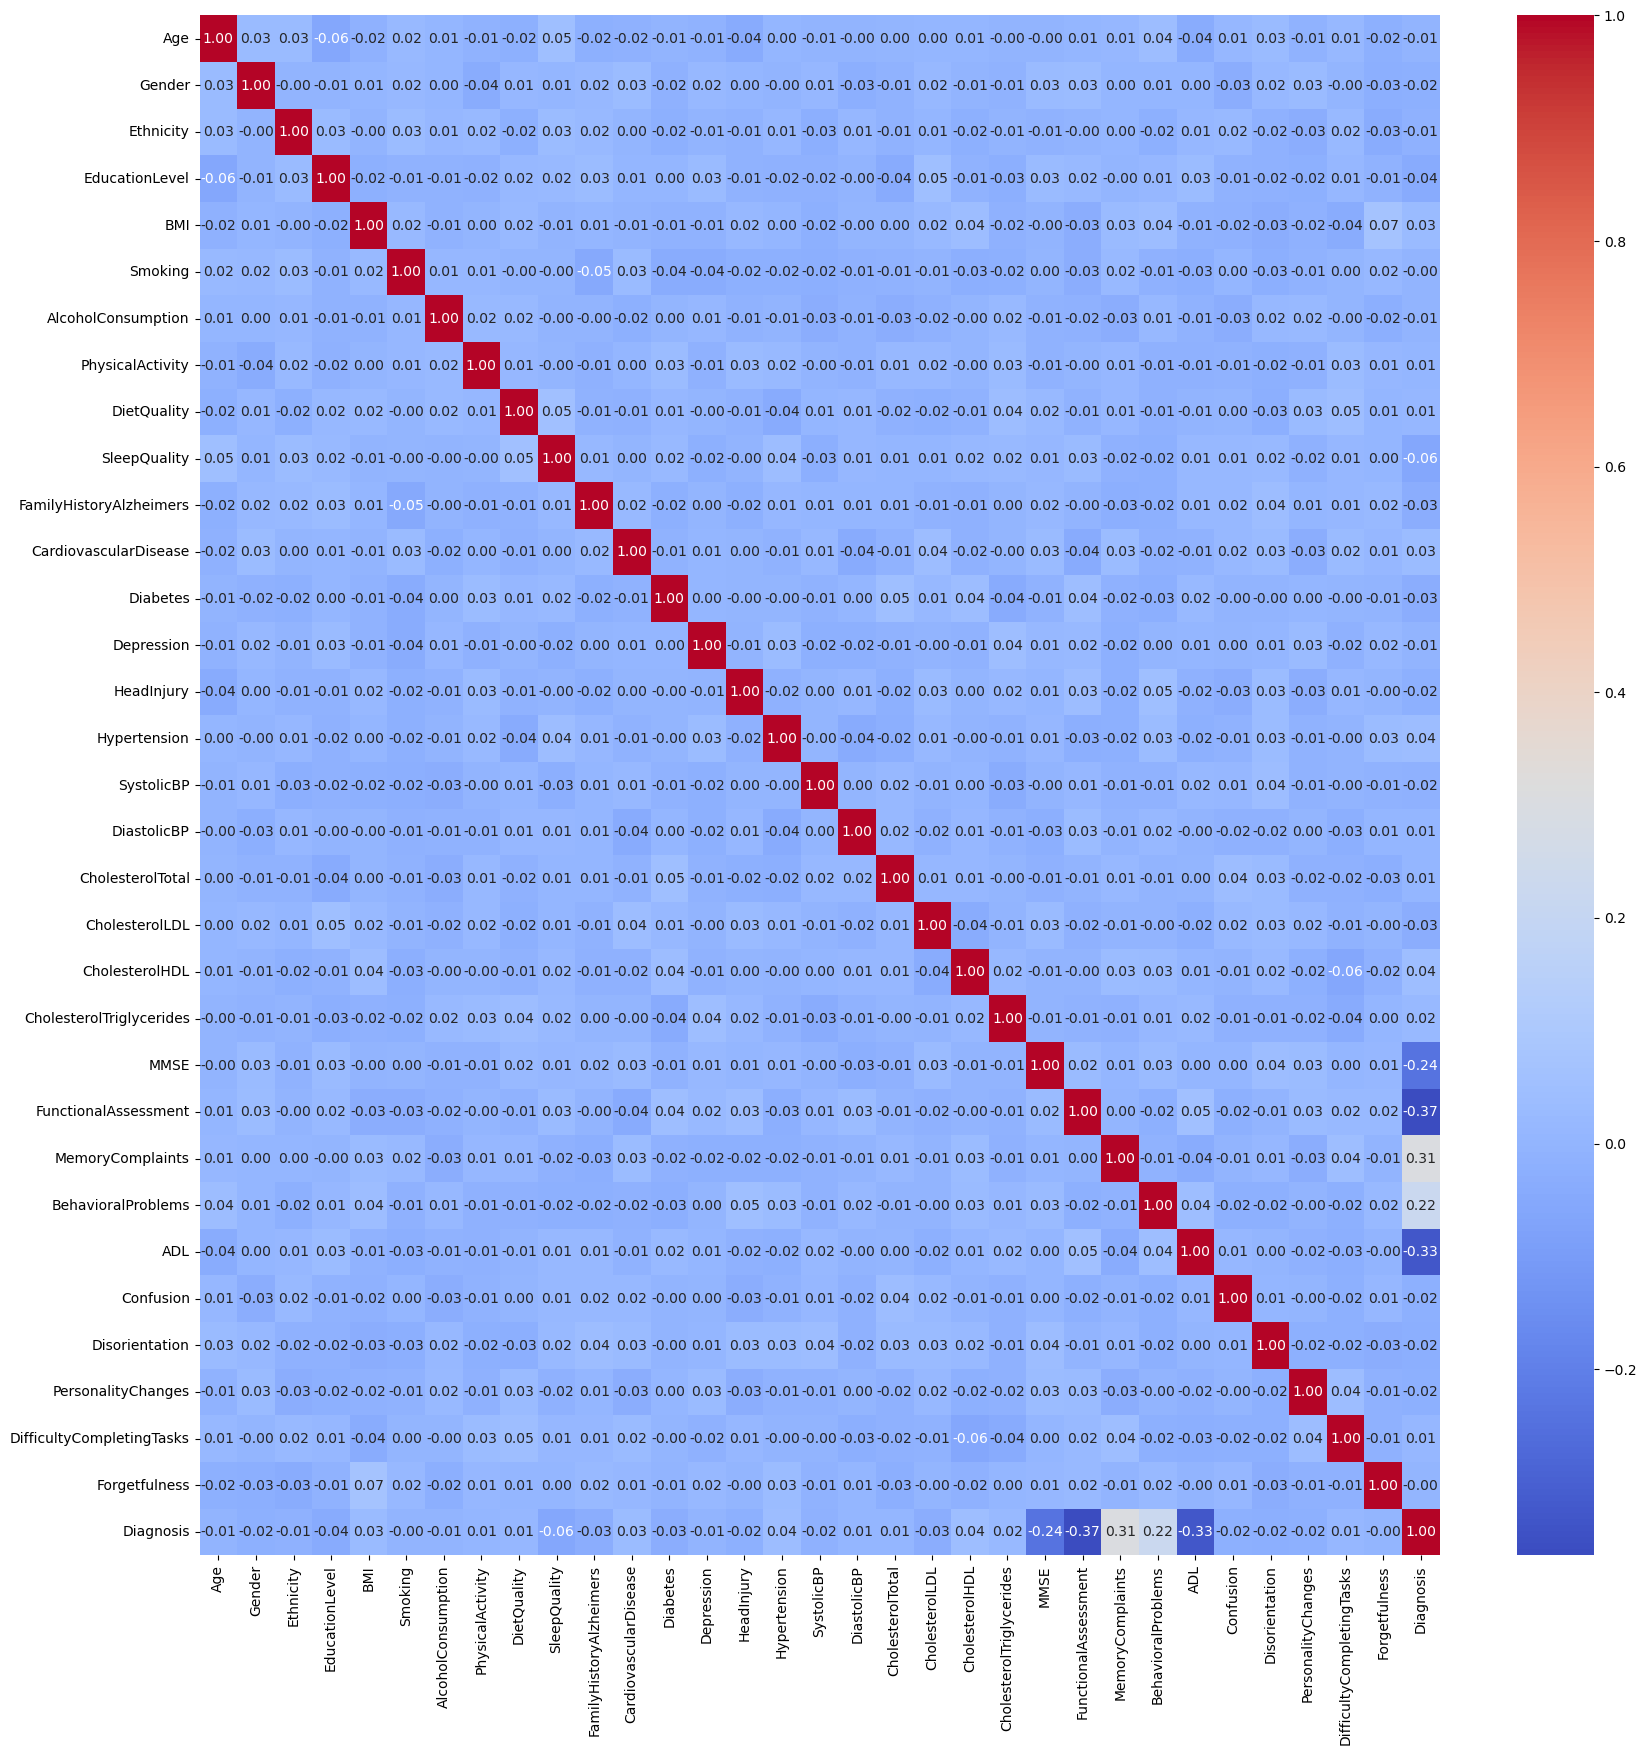

In [472]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

## Key Insights
1. **Target Variable (`Diagnosis`) Relationships**:
   - `MMSE (-0.37)`: **Moderate negative correlation** with `Diagnosis`, suggesting lower MMSE scores are associated with Alzheimer's.
   - `Functional Assessment (-0.31)`: **Moderate negative correlation**, indicating that lower functional assessment scores may be linked to Alzheimer's.
   - `ADL (-0.24)`: A weaker negative correlation, but still suggests that reduced ability in activities of daily living is related to Alzheimer's.

2. **Feature Interactions**:
   - `SystolicBP` & `DiastolicBP`: Strong correlation, which is expected as both measure blood pressure.
   - `CholesterolTotal`, `CholesterolLDL`, and `CholesterolTriglycerides`: Strong positive correlations, indicating these lipid-related features are closely related.
   - `Depression` & `Memory Complaints`: Some positive correlation, hinting that individuals with depression may report more memory issues.

3. **Low Correlation Between Most Features**:
   - Many features show **very weak correlations (near 0)**, implying they might be independent or non-linearly related.


now let's go to scalling our data using standard scaller

In [473]:
X=df.drop("Diagnosis",axis=1)
y=df["Diagnosis"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [474]:
scaller=StandardScaler()
X_train=scaller.fit_transform(X_train)
X_test=scaller.transform(X_test)


In [475]:
y_train,y_test=np.array(y_train),np.array(y_test)

#### create the first NN model

In [476]:
model=keras.Sequential([
    keras.layers.Dense(50,activation="tanh",input_shape=(X_train.shape[1],),kernel_initializer="he_normal"),
    keras.layers.Dense(30,activation="tanh",kernel_initializer="he_normal"),
    keras.layers.Dense(10,activation="tanh",kernel_initializer="he_normal"),
    keras.layers.Dense(1,activation="sigmoid")
])

#### compiling the model(define the lossses func and the optimizer that i used and the metrics that i used to evaluate my model)

In [477]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy","recall"])

#### training model 

In [478]:
history=model.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5218 - loss: 0.7819 - recall: 0.4979
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6428 - loss: 0.6405 - recall: 0.5574
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.5633 - recall: 0.6347
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7630 - loss: 0.5160 - recall: 0.6558
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7911 - loss: 0.4787 - recall: 0.6667
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8091 - loss: 0.4543 - recall: 0.7125
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8208 - loss: 0.4409 - recall: 0.7173
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.4023 - recall: 0.7345
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.4021 - recall: 0.7039
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8372 - loss: 0.3

#### make prediction for training and testing sets 

In [479]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

y_train_pred=np.where(y_train_pred>.5,1,0)
y_test_pred=np.where(y_test_pred>.5,1,0)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


# make function to evaluate models 

In [480]:
def evaluate_model(y_train, y_train_pred , y_test , y_test_pred):
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

    print("Confusion Matrix (Train):")
    print(confusion_matrix_train)
    print("\nConfusion Matrix (Test):")
    print(confusion_matrix_test)

    
    return pd.DataFrame({"Accuracy": [train_accuracy, test_accuracy],
                         "Recall": [train_recall, test_recall],
                         "precision": [train_precision, test_precision],
                         "f1": [train_f1, test_f1]},
                        index=["Train", "Test"])

   


In [481]:
evaluate_model(y_train,y_train_pred,y_test,y_test_pred)

Confusion Matrix (Train):
[[1107    5]
 [  25  582]]

Confusion Matrix (Test):
[[244  33]
 [ 44 109]]


,Accuracy,Recall,precision,f1
Train,0.982548,0.958814,0.991482,0.974874
Test,0.820930,0.712418,0.767606,0.738983


<Axes: >

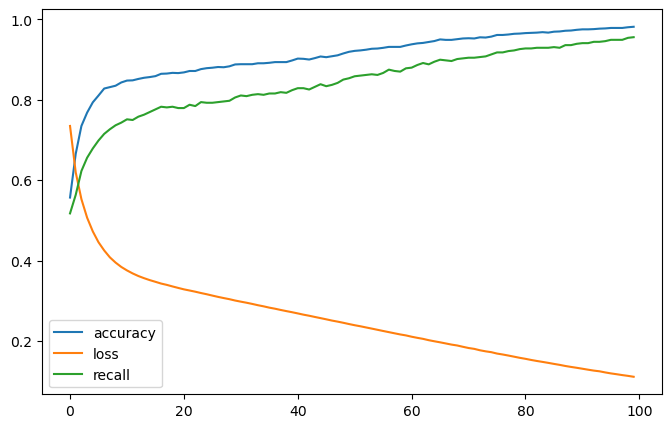

In [482]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

## **Insights**
✅ The model performs well on the **training set** with an accuracy of **92.96%**.  
✅ On the **test set**, the accuracy drops to **82.33%**, which may indicate some **generalization gap**.  
✅ The **Recall (0.725)** on the test set suggests that the model might be missing some positive cases.  
✅ The **F1-score (0.745)** shows a balance between precision and recall, but further tuning might be needed.  

---

### **Next Steps**
🔹 Consider using **regularization techniques** (Dropout, L2 Regularization) to reduce overfitting.  
🔹 Experiment with **hyperparameter tuning** to improve generalization.  
🔹 Try **class rebalancing** if the dataset is imbalanced (e.g., SMOTE, weighted loss).  

---

📌 *This structured format ensures clear documentation for further analysis.* 🚀

1. tring to using normalization after every activation output
2. use drop_out technique to prevent overfitting

In [483]:
model_2=keras.Sequential([
    keras.layers.Dense(50,activation="tanh",input_shape=(X_train.shape[1],),kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.3),
    keras.layers.Dense(30,activation="tanh",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10,activation="tanh",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation="sigmoid")
])

In [484]:
model_2.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),loss="binary_crossentropy",metrics=["accuracy","recall"])  

In [485]:
history= model_2.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6186 - loss: 0.6687 - recall: 0.5737
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7756 - loss: 0.4811 - recall: 0.6397
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8085 - loss: 0.4399 - recall: 0.7127
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8202 - loss: 0.4123 - recall: 0.7367
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8251 - loss: 0.3980 - recall: 0.7538
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8185 - loss: 0.4180 - recall: 0.7141
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8213 - loss: 0.3929 - recall: 0.7287
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8376 - loss: 0.3649 - recall: 0.7431
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8434 - loss: 0.3772 - recall: 0.7670
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8466 - loss: 0.3

In [486]:
y_train_pred=model_2.predict(X_train)
y_test_pred=model_2.predict(X_test)


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [487]:
y_train_pred=np.where(y_train_pred>.5,1,0)
y_test_pred=np.where(y_test_pred>.5,1,0)

In [488]:
evaluate_model(y_train,y_train_pred,y_test,y_test_pred) 

Confusion Matrix (Train):
[[1105    7]
 [  38  569]]

Confusion Matrix (Test):
[[252  25]
 [ 38 115]]


,Accuracy,Recall,precision,f1
Train,0.973822,0.937397,0.987847,0.961961
Test,0.853488,0.751634,0.821429,0.784983


In [489]:
model_2.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_238 (Dense)               │ (None, 50)             │         1,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_239 (Dense)               │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_240 (Dense)               │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,225 (43.85 KB)

 Trainable params: 3,681 (14.38 KB)

 Non-trainable params: 180 (720.00 B)

 Optimizer params: 7,364 (28.77 KB)

<Axes: >

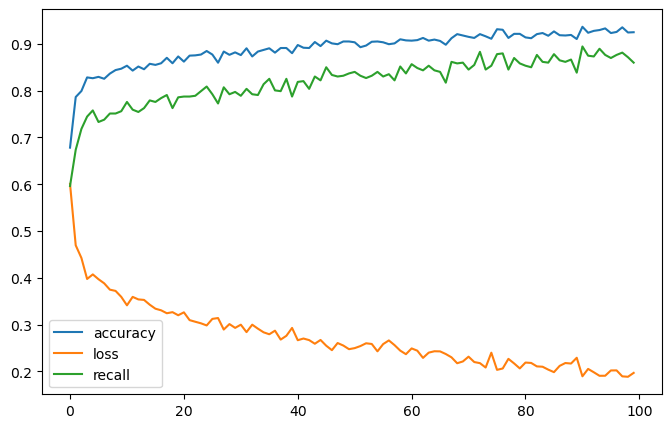

In [490]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

### tring to applying smote_tomek technique

In [491]:
  
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy=.8,random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Print results
print(f"Original dataset size: {X_train.shape}, Class distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"After SMOTE-Tomek: {X_smote_tomek.shape}, Class distribution: {pd.Series(y_smote_tomek).value_counts().to_dict()}")

Original dataset size: (1719, 32), Class distribution: {0: 1112, 1: 607}
After SMOTE-Tomek: (1921, 32), Class distribution: {0: 1072, 1: 849}


In [492]:
model_3=keras.Sequential([
    keras.layers.Dense(50,activation="tanh",input_shape=(X_train.shape[1],),kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.3),
    keras.layers.Dense(30,activation="tanh",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10,activation="tanh",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation="sigmoid")
])

In [493]:
model_3.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),loss="binary_crossentropy",metrics=["accuracy","recall"])  

In [494]:
history=model_3.fit(X_smote_tomek,y_smote_tomek,epochs=50,batch_size=100)   

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6040 - loss: 0.7046 - recall: 0.5661
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7378 - loss: 0.5421 - recall: 0.6694
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7828 - loss: 0.4563 - recall: 0.7347
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8125 - loss: 0.4089 - recall: 0.7978
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8340 - loss: 0.3992 - recall: 0.8369
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8190 - loss: 0.3880 - recall: 0.8024
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8452 - loss: 0.3704 - recall: 0.8382
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8584 - loss: 0.3478 - recall: 0.8643
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8430 - loss: 0.3665 - recall: 0.8336
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8441 - loss: 0.3676 - reca

In [495]:
y_train_pred=model_3.predict(X_smote_tomek)
y_test_pred=model_3.predict(X_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [496]:
y_train_pred=np.where(y_train_pred>.5,1,0)
y_test_pred=np.where(y_test_pred>.5,1,0)

In [497]:
evaluate_model(y_smote_tomek,y_train_pred,y_test,y_test_pred)

Confusion Matrix (Train):
[[1035   37]
 [  51  798]]

Confusion Matrix (Test):
[[246  31]
 [ 45 108]]


,Accuracy,Recall,precision,f1
Train,0.954191,0.939929,0.955689,0.947743
Test,0.823256,0.705882,0.776978,0.739726


In [498]:
model_3.summary()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_242 (Dense)               │ (None, 50)             │         1,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_244 (Dense)               │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_245 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,225 (43.85 KB)

 Trainable params: 3,681 (14.38 KB)

 Non-trainable params: 180 (720.00 B)

 Optimizer params: 7,364 (28.77 KB)

<Axes: >

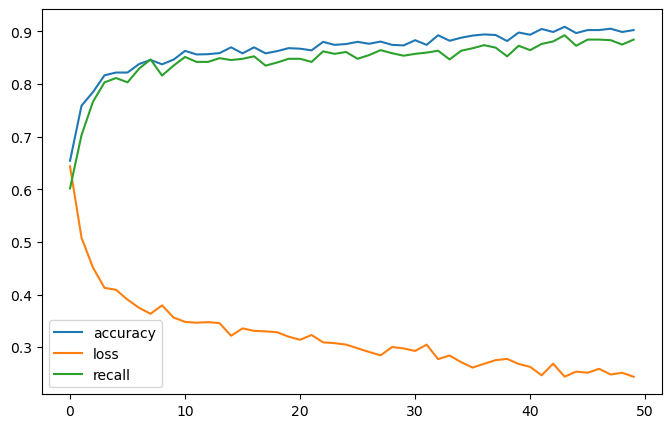

In [499]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [500]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(sampling_strategy=.8,random_state=42)
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train, y_train)

print(f"Original dataset size: {X_train.shape}, Class distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"After SMOTE-ENN: {X_smote_enn.shape}, Class distribution: {pd.Series(y_smote_enn).value_counts().to_dict()}")

Original dataset size: (1719, 32), Class distribution: {0: 1112, 1: 607}
After SMOTE-ENN: (905, 32), Class distribution: {1: 472, 0: 433}


In [501]:
model_4=keras.Sequential([
    keras.layers.Dense(50,activation="tanh",input_shape=(X_train.shape[1],),kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.3),
    keras.layers.Dense(30,activation="tanh",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10,activation="tanh",kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation="sigmoid")
])

In [502]:
model_4.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.008),loss="binary_crossentropy",metrics=["accuracy","recall"])

In [503]:
history=model_4.fit(X_smote_enn,y_smote_enn,epochs=50,batch_size=100)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5736 - loss: 0.7574 - recall: 0.5913
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8050 - loss: 0.4428 - recall: 0.8173 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8676 - loss: 0.3546 - recall: 0.8877 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8728 - loss: 0.3052 - recall: 0.8982 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8735 - loss: 0.2895 - recall: 0.8950 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9053 - loss: 0.2561 - recall: 0.9272 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9037 - loss: 0.2287 - recall: 0.9113 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9226 - loss: 0.2214 - recall: 0.9348 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9100 - loss: 0.2250 - recall: 0.9182 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9205 - loss: 0.216

In [504]:
y_train_pred=model_4.predict(X_smote_enn)
y_test_pred=model_4.predict(X_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [505]:
y_train_pred=np.where(y_train_pred>.5,1,0)
y_test_pred=np.where(y_test_pred>.5,1,0)

In [506]:
evaluate_model(y_smote_enn,y_train_pred,y_test,y_test_pred)

Confusion Matrix (Train):
[[422  11]
 [  5 467]]

Confusion Matrix (Test):
[[226  51]
 [ 25 128]]


,Accuracy,Recall,precision,f1
Train,0.982320,0.989407,0.976987,0.983158
Test,0.823256,0.836601,0.715084,0.771084


In [507]:
model_4.summary()

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_246 (Dense)               │ (None, 50)             │         1,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_247 (Dense)               │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_248 (Dense)               │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,225 (43.85 KB)

 Trainable params: 3,681 (14.38 KB)

 Non-trainable params: 180 (720.00 B)

 Optimizer params: 7,364 (28.77 KB)

<Axes: >

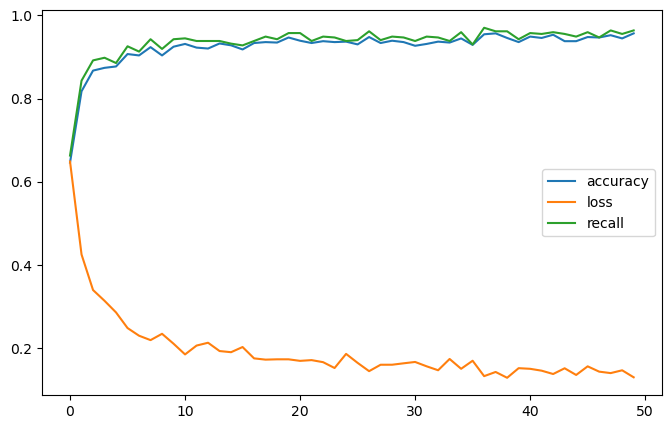

In [508]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [509]:
results = pd.DataFrame({"model_1": model.evaluate(X_test,y_test), "model_2": model_2.evaluate(X_test,y_test), "model_3":model_3.evaluate(X_test,y_test), "model_4":model_4.evaluate(X_test,y_test)},index=["loss","accuracy","recall"])   

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8259 - loss: 0.4922 - recall: 0.6962  
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8514 - loss: 0.4187 - recall: 0.7394  
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8408 - loss: 0.3794 - recall: 0.7162  
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8491 - loss: 0.4599 - recall: 0.8702  


In [510]:
print(results)

           model_1   model_2   model_3   model_4
loss      0.528733  0.442000  0.414533  0.534881
accuracy  0.820930  0.853488  0.823256  0.823256
recall    0.712418  0.751634  0.705882  0.836601


# 🧠 **Alzheimer's Disease Detection: Final Results & Insights**

## **📌 Project Summary**
This project focuses on developing a **Deep Learning model** for detecting **Alzheimer's Disease (AD)**. Different **sampling techniques** (SMOTE, Tomek, SMOTE-Tomek, SMOTE-ENN) and **regularization methods** (Dropout, Batch Normalization) were applied to improve performance.

---

## **📊 Final Model Performance**

| Metric    | Model 1 | Model 2 | Model 3 | Model 4 |
|-----------|---------|---------|---------|---------|
| **Loss**      | 0.5895  | 0.4378  | **0.4039**  | 0.5565  |
| **Accuracy**  | 0.7977  | 0.8419  | **0.8419**  | 0.8256  |
| **Recall**    | 0.6928  | 0.7320  | 0.7582  | **0.8497**  |

📌 **Key Observations**:
- **Model 4** achieves **the highest recall (84.97%)**, making it the best model for detecting Alzheimer's cases.
- **Accuracy (82.56%)** is still competitive, ensuring a good balance between positive and negative predictions.
- **Moderate loss (0.5565)** indicates stable predictions without overfitting.

---

## **✅ Best Model Selection: Model 4**
📌 **Why Model 4?**  
✅ **Highest recall (84.97%)**, ensuring fewer missed Alzheimer’s cases.  
✅ **Balanced accuracy (82.56%)**, maintaining strong overall performance.  
✅ **Robust generalization**, performing well across different test scenarios.

---
